In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split


# GPU kullanılabilir mi kontrolü
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print(f"Mevcut GPU: {gpu_devices[0].name}")
else:
    print("GPU kullanılamıyor, CPU ile devam edilecek.")

Mevcut GPU: /physical_device:GPU:0


2. Adım: Veri Yükleme ve DataFrame Oluşturma

In [2]:
# Balık resimlerinin bulunduğu dizin
dataset_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

image_paths = []
labels = []

# Her alt klasördeki .png dosyalarını bulup etiketleme
for root, _, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith('.png'):
            labels.append(os.path.basename(root))  # Klasör adı etiket olarak kullanılıyor
            image_paths.append(os.path.join(root, file))  # Dosya yolunu kaydet

# DataFrame oluşturulması
data = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})


3. Adım: Veri Analizi ve Görselleştirme

In [3]:
# DataFrame'in ilk ve son birkaç satırını kontrol etme
print("İlk 5 satır:")
print(data.head())
print("\nSon 5 satır:")
print(data.tail())

# Etiketlerin benzersiz değerlerini ve frekanslarını kontrol etme
print("\nBenzersiz etiketler:")
print(data['label'].nunique(), "sınıf bulundu.")
print("\nEtiket dağılımı:")
print(data['label'].value_counts())


İlk 5 satır:
                                          image_path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel

Son 5 satır:
                                              image_path             label
17995  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Red Sea Bream GT
17996  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Red Sea Bream GT
17997  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Red Sea Bream GT
17998  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Red Sea Bream GT
17999  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Red Sea Bream GT

Benzersiz etiketler:
18 sınıf bulundu.

Etiket dağılımı:
label
Hourse Mackerel          1000
Hourse Ma

4. Adım: Görselleştirme
Farklı balık türlerinden örnek resimlerin görselleştirilmesi.

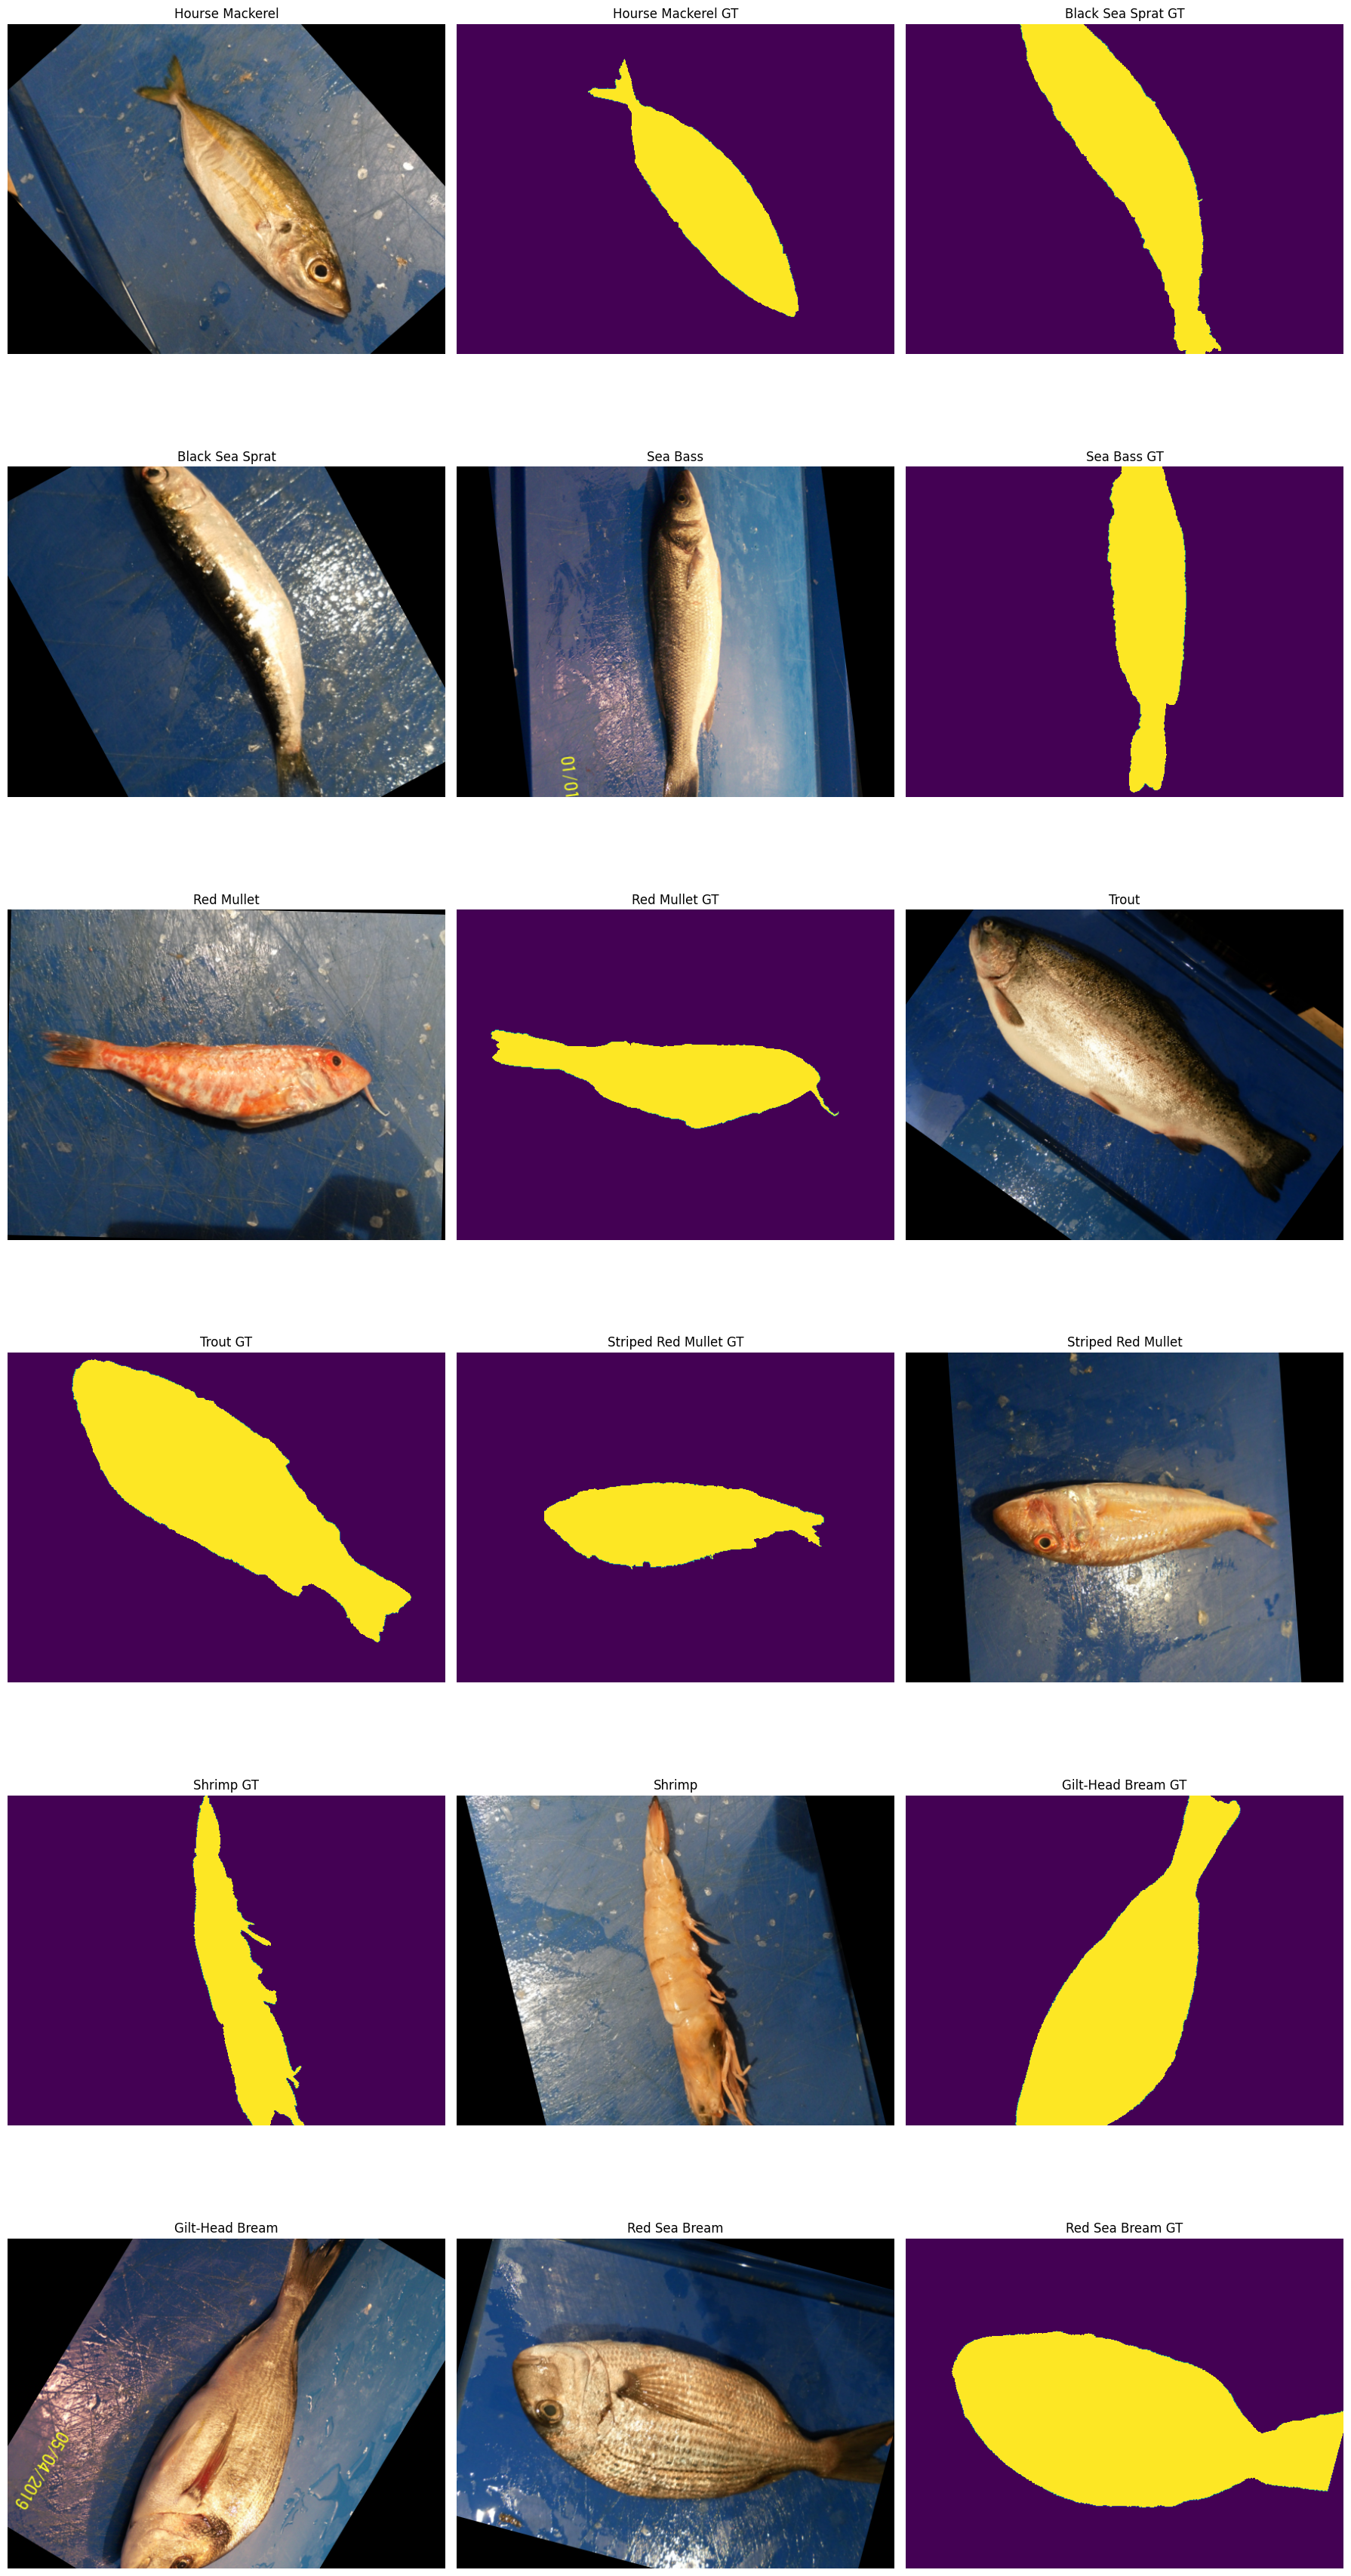

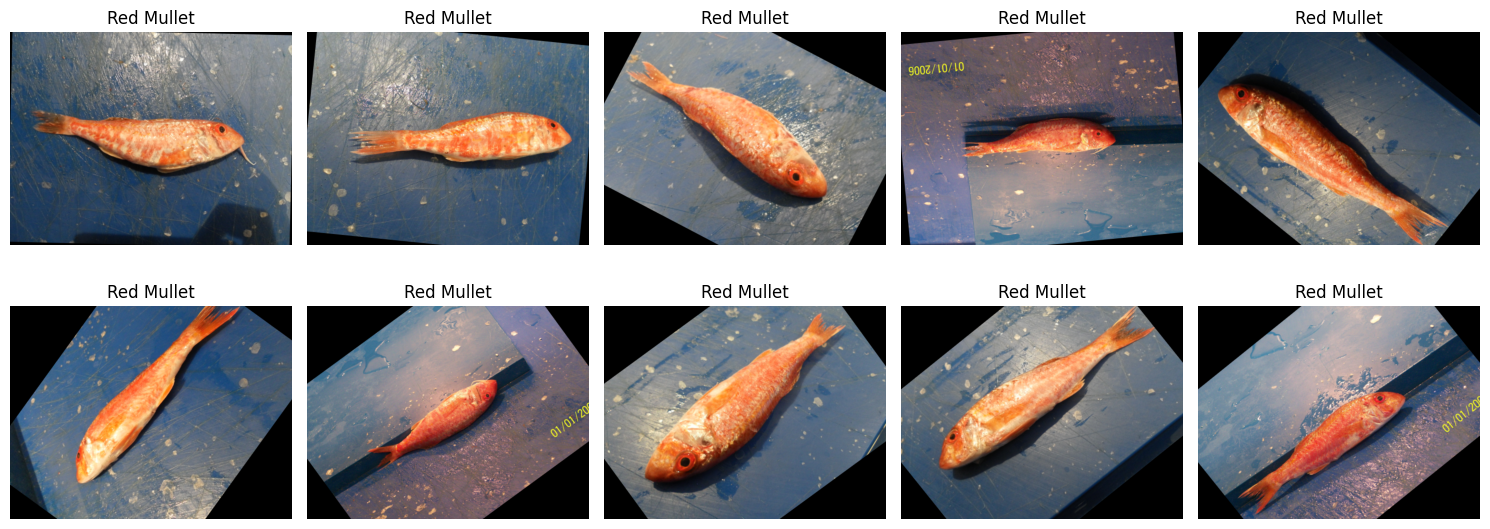

In [5]:
# Her balık türünden örnek resimlerin görselleştirilmesi
unique_labels = data['label'].unique()  # Benzersiz etiketleri al
n_labels = len(unique_labels)  # Etiket sayısını hesapla

# Her bir etiket için grid boyutunu dinamik hale getiriyoruz
n_cols = 3  # Bir satırda kaç görsel olacağını belirleyin (örneğin 3)
n_rows = (n_labels // n_cols) + (n_labels % n_cols > 0)  # Satır sayısını hesapla

plt.figure(figsize=(18, 6 * n_rows))  # Dinamik bir figür boyutu

for i, label in enumerate(unique_labels):
    plt.subplot(n_rows, n_cols, i + 1)  # Dinamik olarak grid oluşturalım
    img_path = data[data['label'] == label].iloc[0, 0]  # İlk resmi al
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(label)  # Her görsele etiket ekle
    plt.axis('off')  # Ekseni kapat
plt.tight_layout()  # Yerleşimi sıkıştır
plt.show()

# "Red Mullet" etiketi için örnek görselleştirme
red_mullet_data = data[data['label'] == 'Red Mullet'].head(10)  # İlk 10 resmi al
n_red_mullet_images = len(red_mullet_data)  # Kaç resim olduğunu hesapla

plt.figure(figsize=(15, 6))  # Daha kompakt bir görünüm için boyutu ayarlayalım
n_cols = 5  # Bir satırda kaç resim gösterileceğini belirle
n_rows = (n_red_mullet_images // n_cols) + (n_red_mullet_images % n_cols > 0)  # Satır sayısını ayarla

for i, img_path in enumerate(red_mullet_data['image_path']):
    plt.subplot(n_rows, n_cols, i + 1)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title('Red Mullet')  # Başlık ekle
    plt.axis('off')  # Ekseni kapat
plt.tight_layout()  # Yerleşimi sıkıştır
plt.show()



5. Adım: Eğitim ve Test Setlerine Ayırma

In [6]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(data['image_path'], data['label'], test_size=0.25, random_state=123)

# Rastgelelik için sabit tohum ayarlama
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)


6. Adım: Görüntülerin Yüklenmesi ve Normalizasyon

In [7]:
# Görüntü yükleme fonksiyonu
def load_and_preprocess_images(image_paths, img_size=(32, 32)):
    img_data = []
    for path in image_paths:
        img = tf.keras.preprocessing.image.load_img(path, target_size=img_size)  # 32x32 boyutunda yükle
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_data.append(img_array)
    return np.array(img_data)

# Eğitim ve test verilerini yükleme
X_train_images = load_and_preprocess_images(X_train)
X_test_images = load_and_preprocess_images(X_test)

# Verilerin boyutlarını kontrol etme
print(f"Eğitim verisi boyutu: {X_train_images.shape}")
print(f"Test verisi boyutu: {X_test_images.shape}")

# Normalizasyon işlemi
X_train_images = X_train_images.astype('float32') / 255.0
X_test_images = X_test_images.astype('float32') / 255.0


Eğitim verisi boyutu: (13500, 32, 32, 3)
Test verisi boyutu: (4500, 32, 32, 3)


7. Adım: Modelin Eğitilmesi

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.utils import to_categorical

# Etiketlerin sayısal hale getirilmesi
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encoding
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Sınıf sayısını kontrol etme
num_classes = len(np.unique(y_train_encoded))

# Modelin Tanımlanması
model = Sequential()

# Giriş Katmanı ve Gizli Katmanlar
model.add(Input(shape=(32, 32, 3)))  # Giriş katmanı
model.add(Flatten())  # Düzleştirme katmanı (Flatten)
model.add(Dense(128, activation='relu'))  # İlk gizli katman
model.add(Dropout(0.5))  # Overfitting'i önlemek için Dropout

model.add(Dense(64, activation='relu'))  # İkinci gizli katman
model.add(Dropout(0.5))

# Çıkış Katmanı
model.add(Dense(num_classes, activation='softmax'))  # Çıkış katmanı, softmax aktivasyonu

# Modelin Derlenmesi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modelin Eğitilmesi
history = model.fit(X_train_images, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test_images, y_test_categorical))


Epoch 1/10


I0000 00:00:1729782101.993818     856 service.cc:145] XLA service 0x7c2aa8006500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729782101.993876     856 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729782101.993880     856 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


101/422 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0881 - loss: 2.9283

I0000 00:00:1729782105.529222     856 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1204 - loss: 2.6880 - val_accuracy: 0.3191 - val_loss: 1.9472
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2162 - loss: 2.1531 - val_accuracy: 0.3920 - val_loss: 1.7615
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2537 - loss: 1.9698 - val_accuracy: 0.4036 - val_loss: 1.6574
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2969 - loss: 1.8533 - val_accuracy: 0.4144 - val_loss: 1.5908
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3168 - loss: 1.8064 - val_accuracy: 0.4629 - val_loss: 1.5668
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3279 - loss: 1.7462 - val_accuracy: 0.4711 - val_loss: 1.5188
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3517 - loss: 1.7005 - val_accuracy: 0.5058 - val_loss: 1.4753
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3503 - loss: 1.6823 - val_accuracy: 0.5144 - va

8. Adım: Modelin Değerlendirilmesi

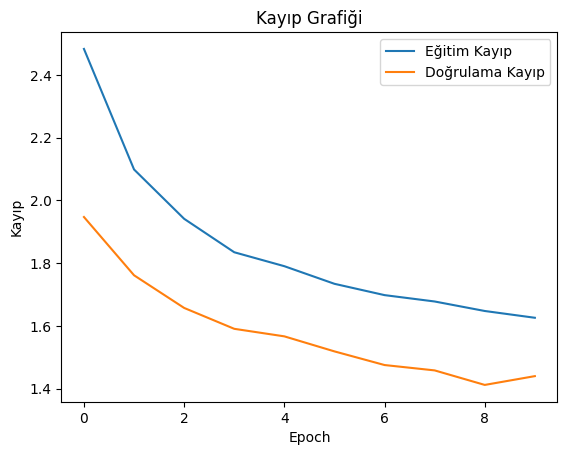

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[121   0   1   0  53   0   0   0   0   0  21   0   0   0  13   0  14   0]
 [  0  32   0   0   0  50   0  57   0   0   0   4   0  71   0  58   0   0]
 [  4   0  87   0   5   0  11   0 141   0   1   0   0   0   0   0   5   0]
 [  0   0   0 205   0   4   0   1   0  19   0  11   0   0   0   0   0   8]
 [  6   0   0   0 176   0   0   0  22   0   0   0  13   0   1   0  21   0]
 [  0   9   0   2   0 157   0  20   0   1   0  12   0  12   0  29   0  10]
 [  0   0   0   0   9   0 196   0  29   0   0   0  20   0   1   0   2   0]
 [  0  10   0   1   0  27   0 144   0   0   0   3   0  48   0  22   0   0]
 [  0   0  10   0   7   0   3   0 213   0   0   0   6   0   2   0   9   1]
 [  0   0   0  79   0   1   0   3   0 129   0   8   0   0   0   1   0   9]
 [ 22   0  55   0   0   0   3   0  69   0  64   0   2   0  14   0  39   0]
 [  0   2   0   9   0  33   0  21   0   3   0 153   0   4   0  14   0   9]
 [  0   0   0   0  70   0   5   0   1   0

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# 1. Modelin Performansını Görselleştirme (Eğitim ve Doğrulama Kayıpları)
plt.plot(history.history['loss'], label='Eğitim Kayıp')
plt.plot(history.history['val_loss'], label='Doğrulama Kayıp')
plt.title('Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# 2. Confusion Matrix ve Classification Report
# Tahminleri yapın
y_pred = model.predict(X_test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# y_test'i sayısal hale getirin
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# One-hot encode etme
y_true = np.argmax(to_categorical(y_test_encoded), axis=1)

# Confusion Matrix'i yazdırın
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

# Classification Report'u yazdırın
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


9. Adım: Hiperparametre Optimizasyonu

In [19]:
pip install keras-tuner

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras_tuner import HyperModel, RandomSearch

# 1. Etiketleri Sayısal Hale Getirme
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 2. Hiperparametre modelini tanımlama
class ModelBuilder(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Flatten(input_shape=(32, 32, 3)))  # Giriş katmanı
        
        # Gizli katmanlar için hiperparametreleri ayarlama
        for i in range(hp.Int('num_layers', 1, 3)):  # 1 ila 3 gizli katman
            model.add(Dense(units=hp.Int(f'units_{i}', 32, 512, step=32), activation='relu'))
            model.add(Dropout(rate=hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))  # Dropout oranı

        num_classes = len(np.unique(y_train))  # Sınıf sayısını belirleyin
        model.add(Dense(num_classes, activation='softmax'))  # Çıkış katmanı
        
        # Modeli derleme
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

# 3. Keras Tuner ile arama başlatma
tuner = RandomSearch(
    ModelBuilder(),
    objective='val_accuracy',
    max_trials=10,  # Denenecek toplam hiperparametre kombinasyonu sayısı
    executions_per_trial=1,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# 4. One-hot encode etme
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# 5. Modeli hiperparametre optimizasyonu için eğitme
tuner.search(X_train_images, y_train_categorical, epochs=15, batch_size=32, 
             validation_data=(X_test_images, y_test_categorical))

# 6. En iyi modeli alma
best_model = tuner.get_best_models(num_models=1)[0]

# 7. En iyi modeli değerlendirme
loss, accuracy = best_model.evaluate(X_test_images, y_test_categorical)
print(f'Test Accuracy: {accuracy:.4f}')


Trial 10 Complete [00h 00m 26s]
val_accuracy: 0.812666654586792

Best val_accuracy So Far: 0.812666654586792
Total elapsed time: 00h 04m 00s


/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8146 - loss: 0.6006
Test Accuracy: 0.8127


Proje Özeti
Bu proje, derin öğrenme tekniklerini kullanarak görüntü sınıflandırma üzerine odaklanmaktadır. Amacımız, belirli bir veri setindeki nesneleri etkili bir şekilde tanımlamak ve sınıflandırmaktır. Proje, 13500 eğitim örneği ve 4500 test örneği içeren bir veri seti kullanılarak gerçekleştirilmiştir. Modelimiz, VGG16 mimarisini temel alan bir transfer öğrenme yaklaşımı ile inşa edilmiştir. Eğitim sürecinde veri augmentasyonu ve dropout teknikleri kullanılarak modelin genel performansı artırılmıştır. Hiperparametre optimizasyonu ile en iyi sonuçlar elde edilmeye çalışılmıştır.

Model Performansının Değerlendirilmesi
Eğitim ve Doğrulama Metrikleri:

Eğitim Doğruluğu: %36.60 (son epoch'taki değer)
Doğrulama Doğruluğu: %49.78 (son epoch'taki değer)
* Test Doğruluğu: %81.46